In [1]:
import os
from github import Github
from dotenv import load_dotenv
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import networkx as nx
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
import matplotlib.pyplot as plt


#create an empty graph
G = nx.Graph()

In [2]:
# create nodes and edges between users and repositories
with open('dataset/users.csv', 'r') as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        if i == 0: # Skip the header columns
            continue
        # transform the string of repositories into an array of strings
        row[2:4] = [x.replace(' ', '').replace('[', '').replace(']', '').replace('\'', '').replace('"', '').split(',') for x in row[2:4]]
        # Add the user node to graph with blue color
        G.add_node(row[0], name=row[1], repos=row[2], commits= row[3], color='#F8A643')

In [3]:
#create nodes and edges bewtween repositories and languages
with open('dataset/repos.csv', 'r') as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        if i == 0: # Skip the header columns
            continue
        # transform the string of languages into an array of strings
        row[2], row[5], row[6] = tuple(x.replace(' ', '').replace('[', '').replace(']', '').replace('\'', '').replace('"', '').split(',') for x in (row[2], row[5], row [6]))
        
        G.add_node(row[0], name=row[1], topics=row[2], n_star=row[3], n_fork=row[4], languages=row[5], p_lang=row[6], color='#5D7EF5')

In [4]:
# Open the CSV file and read the data for languages
with open('dataset/languages.csv', 'r') as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        if i == 0: # Skip the header columns
            continue
        # Add the language node to graph with green color
        G.add_node(row[0], language=row[1], color='#30FBD0')




In [5]:
#create edges between users, repositories and languages
for node in list(G.nodes):
    # if it's a user node
    if len(node) >= 1:
        if node[0] == "u":
            # for each repository in the user's list of repositories
            for repo in G.nodes[node]['repos']:
                # add an edge between the user and the repository
                G.add_edge(node, repo)
        if node[0] == "r":
            # for each language in the repository's list of languages
            for lang in G.nodes[node]['languages']:
                # add an edge between the repository and the language
                G.add_edge(node, lang)     

nx.info(G)

/var/folders/w2/jn05b8cd0kj32r1y2sywf38w0000gn/T/ipykernel_1298/4017047192.py:16: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G)


'Graph with 1499 nodes and 2369 edges'

In [6]:
# create a subgraph with only 'repository' and 'user' nodes
subgraph_nodes = [n for n in G.nodes if n.startswith(('u', 'r'))]
# create edges between users and repositories
user_repo_edges = [(u, v) for (v, u) in G.edges if u.startswith('u_') and v.startswith('r_')]
subgraph_ru = G.subgraph(subgraph_nodes)

In [7]:
# crea un sottografo con i nodi utente
user_nodes = [n for n in G.nodes if n.startswith("u")]
subgraph = G.subgraph(user_nodes).copy()

# aggiungi gli archi tra utenti che hanno contribuito alla stessa repository
for repo_node in subgraph_ru.nodes:
    # se il nodo corrente è una repository
    if repo_node.startswith("r"):
        # crea un insieme di utenti che hanno contribuito alla repository corrente
        repo_users = set(subgraph_ru.neighbors(repo_node)).intersection(user_nodes)
        # crea gli archi tra le coppie di utenti che hanno contribuito alla stessa repository
        subgraph.add_edges_from(combinations(repo_users,2))

nx.info(subgraph)

/var/folders/w2/jn05b8cd0kj32r1y2sywf38w0000gn/T/ipykernel_1298/420969897.py:14: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(subgraph)


'Graph with 271 nodes and 284 edges'

Component 0 has 46 nodes
Component 1 has 8 nodes
Component 2 has 7 nodes
Component 3 has 6 nodes
Component 4 has 6 nodes
Component 5 has 6 nodes
Component 6 has 5 nodes
Component 7 has 5 nodes
Component 8 has 4 nodes
Component 9 has 3 nodes


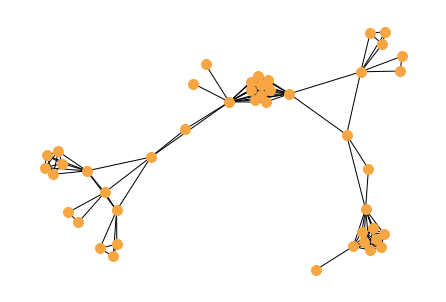

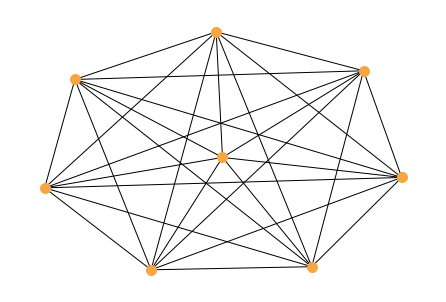

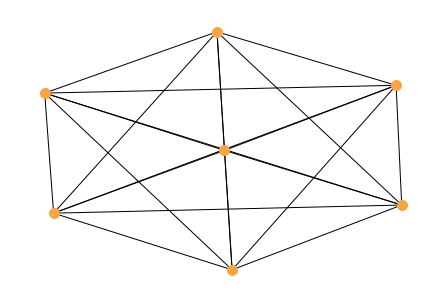

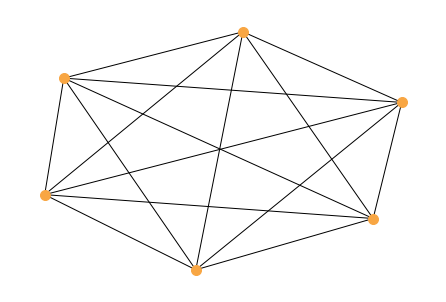

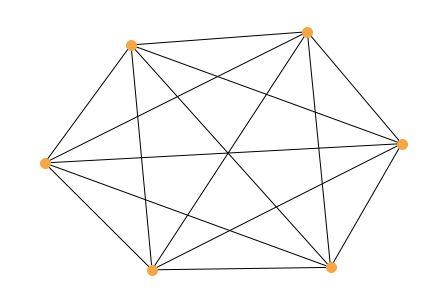

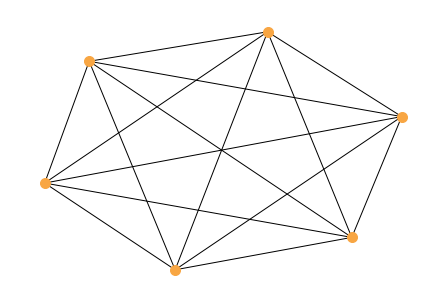

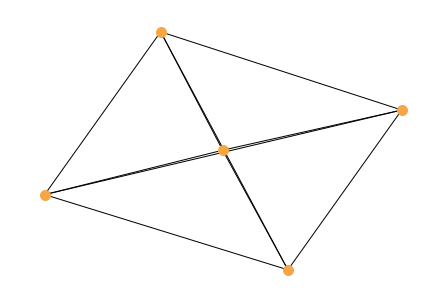

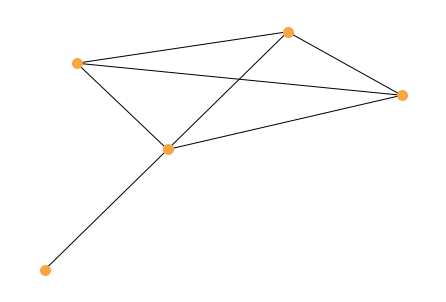

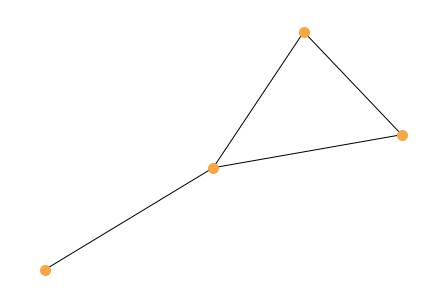

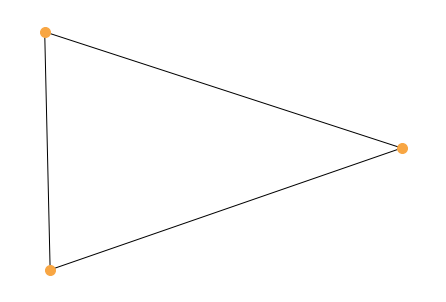

In [26]:
#calculate the component of the subgraph
components = list(nx.connected_components(subgraph))

# create a list of subgraphs
subgraphs = [subgraph.subgraph(c) for c in components]

# create a list of top 5 subgraphs
subgraphs = sorted(subgraphs, key=lambda x: len(x.nodes), reverse=True)[:10]

# print all the subgraphs
for i, g in enumerate(subgraphs):
    print("Component", i, "has", len(g.nodes), "nodes")

# draw all the subgraphs
for i, g in enumerate(subgraphs):
    nx.draw(g, node_color= '#F8A643', node_size = 100)
    plt.show()
    

In [10]:
#create a  graph with only repositories
repo_nodes = [n for n in G.nodes if n.startswith("r")]
subgraph_repos = G.subgraph(repo_nodes).copy()
no_topic_repos= nx.Graph()

for node in subgraph_repos:
    #check if the node have topics value different from ['']
    if subgraph_repos.nodes[node]['topics'] != ['']:
        #add node to no_topic_repos graph
        no_topic_repos.add_node(node, name=subgraph_repos.nodes[node]['name'], topics=subgraph_repos.nodes[node]['topics'], n_star=subgraph_repos.nodes[node]['n_star'], n_fork=subgraph_repos.nodes[node]['n_fork'], languages=subgraph_repos.nodes[node]['languages'], p_lang=subgraph_repos.nodes[node]['p_lang'], color='#5D7EF5')

nx.info(no_topic_repos)

/var/folders/w2/jn05b8cd0kj32r1y2sywf38w0000gn/T/ipykernel_3319/2484670841.py:12: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(no_topic_repos)


'Graph with 33 nodes and 0 edges'

/var/folders/w2/jn05b8cd0kj32r1y2sywf38w0000gn/T/ipykernel_3319/1333126054.py:29: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(new_subgraph_users)


'Graph with 26 nodes and 22 edges'

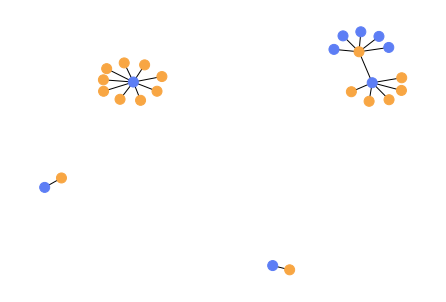

In [11]:
#create a graph with users
user_nodes = [n for n in G.nodes if n.startswith("u")]
subgraph_users = G.subgraph(user_nodes).copy()
new_subgraph_users = nx.Graph()

# check the user that have contributed in any repository of the graph no_topic_repos
for node in subgraph_users:
    # get the repositories that the user has contributed to
    repos = subgraph_users.nodes[node]['repos']
    # check if any of the user's repositories are in no_topic_repos
    if any(repo in no_topic_repos.nodes for repo in repos):
        # add user node to new_subgraph_users
        new_subgraph_users.add_node(node, name=subgraph_users.nodes[node]['name'], repos=repos, commits=subgraph_users.nodes[node]['commits'], color='#F8A643')
        # add edges between user node and the repositories in no_topic_repos
        for repo in repos:
            if repo in no_topic_repos.nodes:
                new_subgraph_users.add_node(repo, name=no_topic_repos.nodes[repo]['name'], topics=no_topic_repos.nodes[repo]['topics'], n_star=no_topic_repos.nodes[repo]['n_star'], n_fork=no_topic_repos.nodes[repo]['n_fork'], languages=no_topic_repos.nodes[repo]['languages'], p_lang=no_topic_repos.nodes[repo]['p_lang'], color='#5D7EF5')
                new_subgraph_users.add_edge(node, repo)

#draw the graph with different colors for users and repositories
for node in new_subgraph_users:
    if node[0] == "u":
        new_subgraph_users.nodes[node]['color'] = '#F8A643'
        new_subgraph_users.nodes[node]['size'] = '400'
    else:
        new_subgraph_users.nodes[node]['color'] = '#5D7EF5'

nx.draw(new_subgraph_users,node_color=[new_subgraph_users.nodes[node]['color'] for node in new_subgraph_users.nodes], node_size= 100)
nx.info(new_subgraph_users)


/var/folders/w2/jn05b8cd0kj32r1y2sywf38w0000gn/T/ipykernel_3319/2603047066.py:24: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(new_subgraph)


'Graph with 50 nodes and 22 edges'

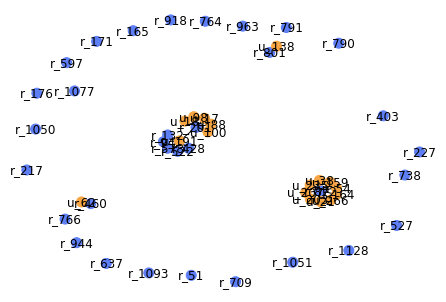

In [12]:
new_subgraph = nx.Graph()

# Aggiungi tutti i nodi repository di no_topic_repos a new_subgraph
for repo_node in no_topic_repos.nodes():
    new_subgraph.add_node(repo_node, name=no_topic_repos.nodes[repo_node]['name'], topics=no_topic_repos.nodes[repo_node]['topics'], n_star=no_topic_repos.nodes[repo_node]['n_star'], n_fork=no_topic_repos.nodes[repo_node]['n_fork'], languages=no_topic_repos.nodes[repo_node]['languages'], p_lang=no_topic_repos.nodes[repo_node]['p_lang'], color='#5D7EF5')

# Itera su tutti i nodi utente di subgraph_users
for user_node in subgraph_users.nodes():
    # Itera su tutti i nodi repository dei campi 'repos' di user_node
    for repo_node in subgraph_users.nodes[user_node]['repos']:
        # Se il nodo repository esiste in no_topic_repos, aggiungi il nodo utente e il nodo repository a new_subgraph, e aggiungi un arco tra di loro
        if repo_node in no_topic_repos.nodes():
            new_subgraph.add_node(user_node, name=subgraph_users.nodes[user_node]['name'], repos=subgraph_users.nodes[user_node]['repos'], commits=subgraph_users.nodes[user_node]['commits'], color='#F8A643')
            new_subgraph.add_edge(user_node, repo_node)
#draw the graph with different colors for users and repositories
for node in new_subgraph:
    if node[0] == "u":
        new_subgraph.nodes[node]['color'] = '#F8A643'
        new_subgraph.nodes[node]['size'] = '400'
    else:
        new_subgraph.nodes[node]['color'] = '#5D7EF5'

nx.draw(new_subgraph,node_color=[new_subgraph.nodes[node]['color'] for node in new_subgraph.nodes], node_size= 100, with_labels=True)
nx.info(new_subgraph)


Component 0 has 9 nodes
Component 1 has 6 nodes
Component 2 has 1 nodes
Component 3 has 1 nodes


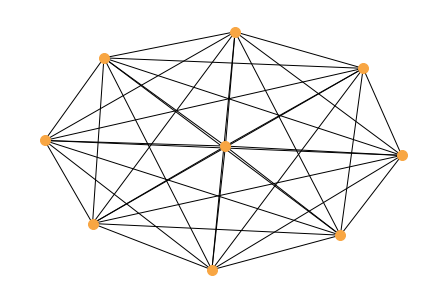

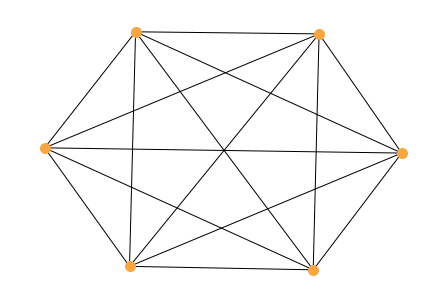

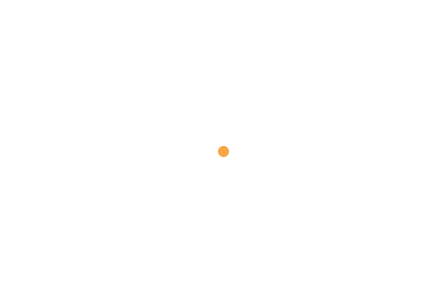

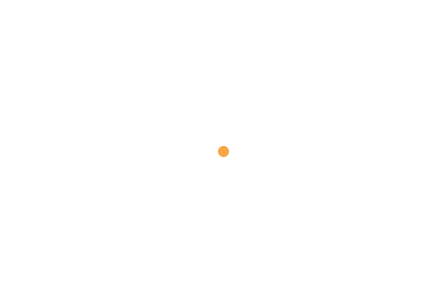

In [27]:
#calculate the component of the subgraph
components = list(nx.connected_components(new_subgraph_users))

# create a list of subgraphs
subgraphs_list = [subgraph.subgraph(c) for c in components]

# create a list of top 5 subgraphs
subgraphs_list = sorted(subgraphs_list, key=lambda x: len(x.nodes), reverse=True)[:5]

# print all the subgraphs
for i, g in enumerate(subgraphs_list):
    print("Component", i, "has", len(g.nodes), "nodes")

# draw all the subgraphs
for i, g in enumerate(subgraphs_list):
    nx.draw(g, node_size = 100, node_color= '#F8A643')
    plt.show()

In [14]:
#chec if the subgraphs_list have the same component of subgraphs
for i, g in enumerate(subgraphs_list):
    if g.nodes != subgraphs[i].nodes:
        print("Component", i, "is different")
    else:
        print("Component", i, "is equal")


Component 0 is different
Component 1 is different
Component 2 is different
Component 3 is different


In [15]:
#calculate the betweenness centrality of all user node
betweenness = nx.betweenness_centrality(subgraph, normalized=True)

#calculate the betweenness centrality of languages nodes
lang_btc = {k: v for k, v in betweenness.items() if k.startswith('u_')}

#print the betweenness centrality of firts 5 languages in descendig order
for node, centrality in sorted(lang_btc.items(), key=lambda x: x[1], reverse=True)[:10]:
    print("Node", node, "has betweenness centrality", centrality)


Node u_238 has betweenness centrality 0.01396117306897976
Node u_148 has betweenness centrality 0.013382899628252789
Node u_237 has betweenness centrality 0.011455321492496213
Node u_185 has betweenness centrality 0.010298774611042269
Node u_235 has betweenness centrality 0.008921933085501859
Node u_64 has betweenness centrality 0.0056725870852264906
Node u_67 has betweenness centrality 0.005507366102161641
Node u_157 has betweenness centrality 0.003469640644361834
Node u_172 has betweenness centrality 0.0023681674239295057
Node u_207 has betweenness centrality 0.001211620542475561


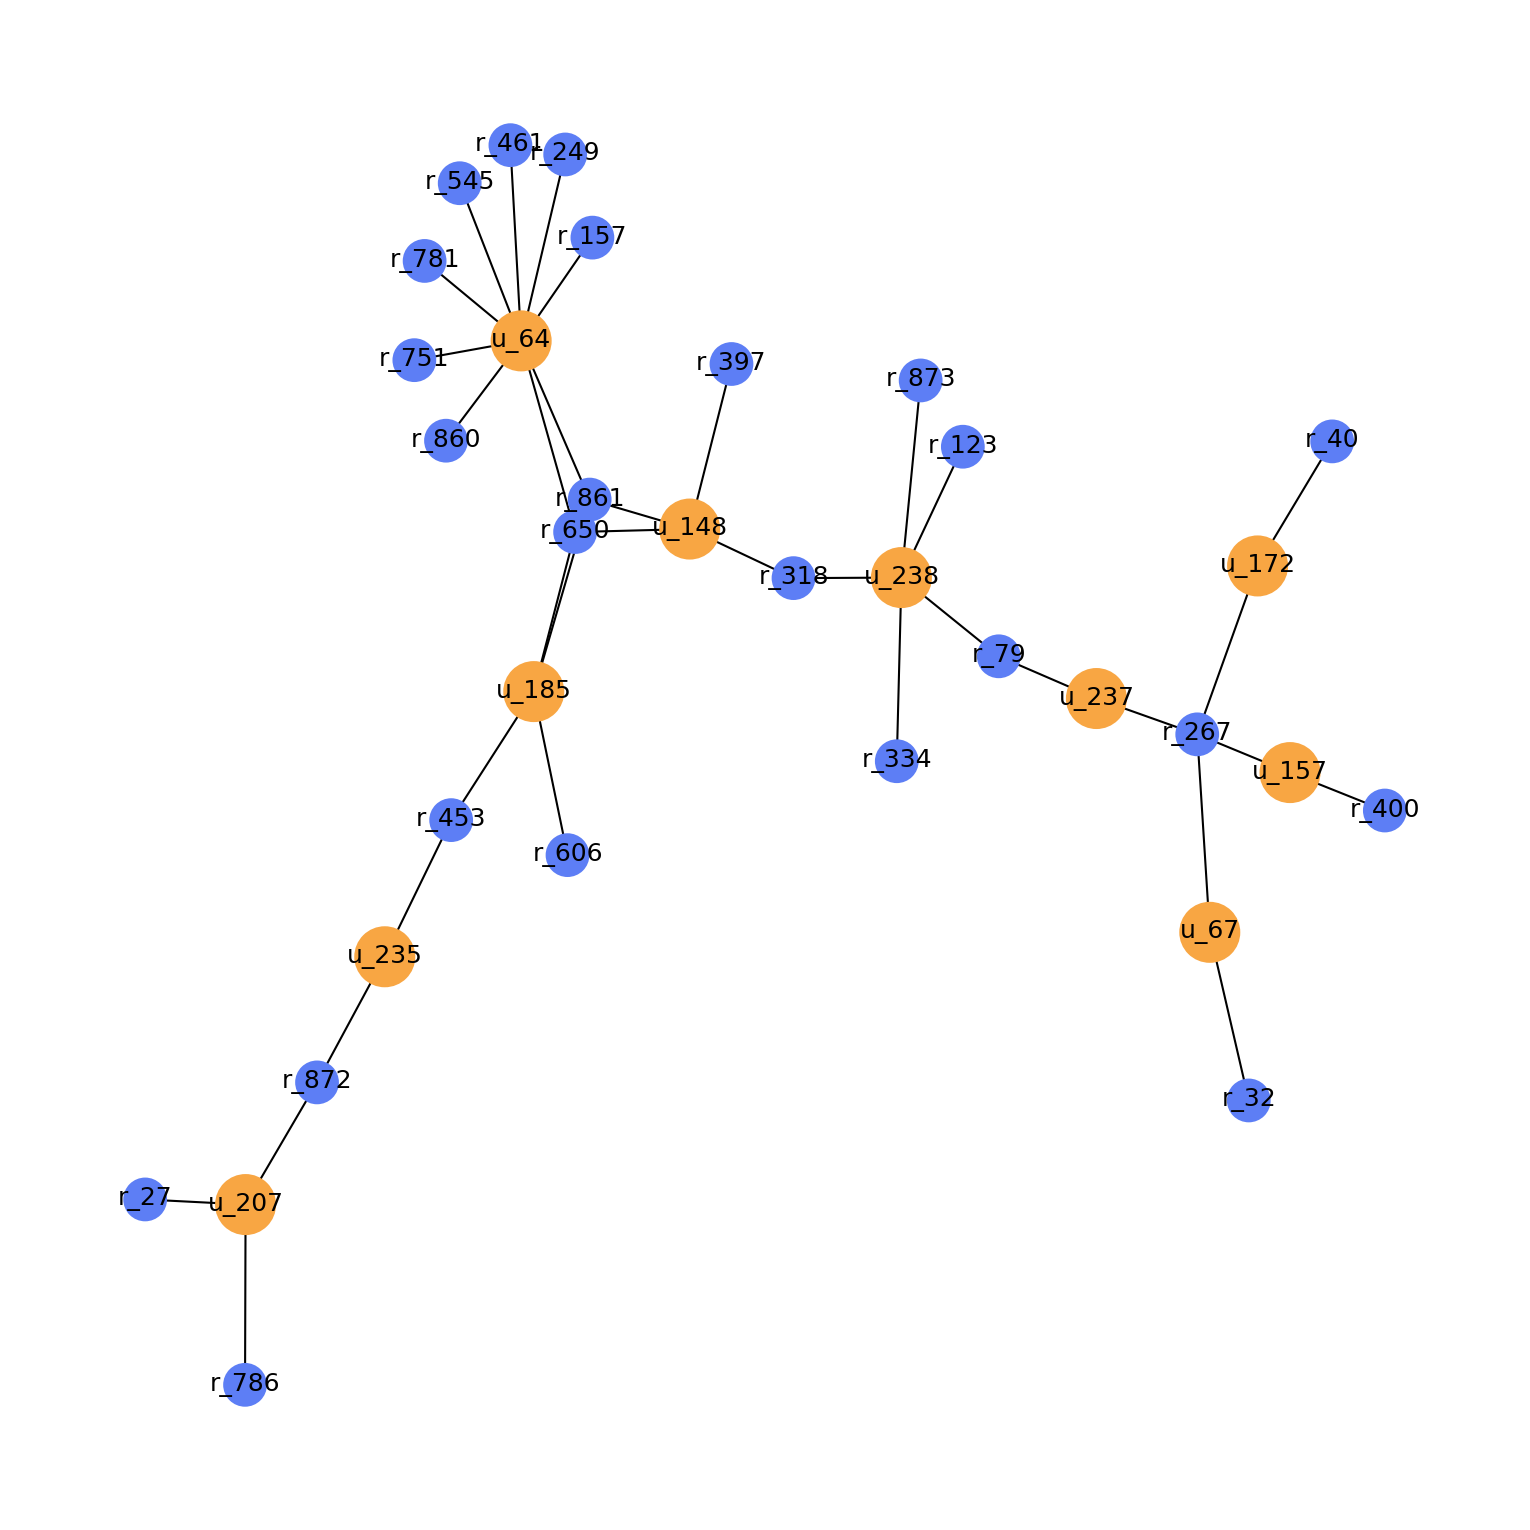

In [31]:
# Draw the graph containing only the top 5 user with neighbours based on degree centrality
languages_subgraph = nx.Graph()
for node in sorted(lang_btc, key=lang_btc.get, reverse=True)[:10]:
    languages_subgraph.add_node(node, color = G.nodes[node]['color'])
    for neighbour in G.neighbors(node):
        if neighbour[0] == "u":
            languages_subgraph.add_node(neighbour, color = G.nodes[neighbour]['color'])
        else:
            languages_subgraph.add_node(neighbour, color = G.nodes[neighbour]['color'])
        languages_subgraph.add_edge(node, neighbour)

plt.figure(num=None, figsize=(10, 10), dpi=150)
pos = nx.kamada_kawai_layout(languages_subgraph)
node_sizes = []
for node in languages_subgraph.nodes:
    if node.startswith('u_'):
        node_sizes.append(800)
    elif node.startswith('u_'):
        node_sizes.append(400)
    else:
        node_sizes.append(400)
nx.draw(languages_subgraph, pos, node_size=node_sizes, node_color=[languages_subgraph.nodes[node]['color'] for node in languages_subgraph.nodes], with_labels=True)
#labels = {node: node for node in languages_subgraph.nodes if node.startswith('u_')}
#nx.draw_networkx_labels(languages_subgraph, pos, labels, font_size=10)

k-mean clustering


Il calcolo del k-means clustering su questo sottografo potrebbe aiutare a identificare le comunità di utenti che utilizzano gli stessi linguaggi di programmazione o collaborano su progetti simili. In particolare, il clustering potrebbe rivelare se ci sono gruppi di utenti che collaborano principalmente su progetti legati a un determinato linguaggio di programmazione o se ci sono gruppi di utenti che collaborano su progetti che coprono diversi linguaggi di programmazione. Questa informazione potrebbe essere utile per scopi come il recruiting di sviluppatori per un progetto specifico o l'identificazione di trend nella comunità di sviluppatori.

In [17]:
adj_matrix = nx.adjacency_matrix(subgraph)

# Calcolo del k-means clustering
k = 3 # Numero di cluster desiderato
kmeans = KMeans(n_clusters=k, random_state=0).fit(adj_matrix)

# Visualizzazione dei risultati
for i in range(k):
    nodes = np.where(kmeans.labels_ == i)[0]
    print("Cluster", i, ":", nodes)

Cluster 0 : [  9  87 119 125 135 136 158 166 195]
Cluster 1 : [  0   1   2   3   4   5   6   7   8  10  11  12  13  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  49  50  51  52  53  54  55  56
  57  58  59  60  61  62  63  65  67  68  69  70  71  72  73  74  75  76
  77  78  79  80  81  82  83  84  85  86  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 120 121 122 123 124 126 127 128 129 131 132 133 134
 137 138 139 141 142 143 144 145 146 147 148 149 151 152 153 154 155 156
 157 159 160 161 162 163 164 165 167 168 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 187 188 189 190 191 192 193 194 196
 197 198 199 200 201 202 203 204 206 207 208 209 210 211 212 213 214 215
 216 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 2

/var/folders/w2/jn05b8cd0kj32r1y2sywf38w0000gn/T/ipykernel_3319/1721559591.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj_matrix = nx.adjacency_matrix(subgraph)


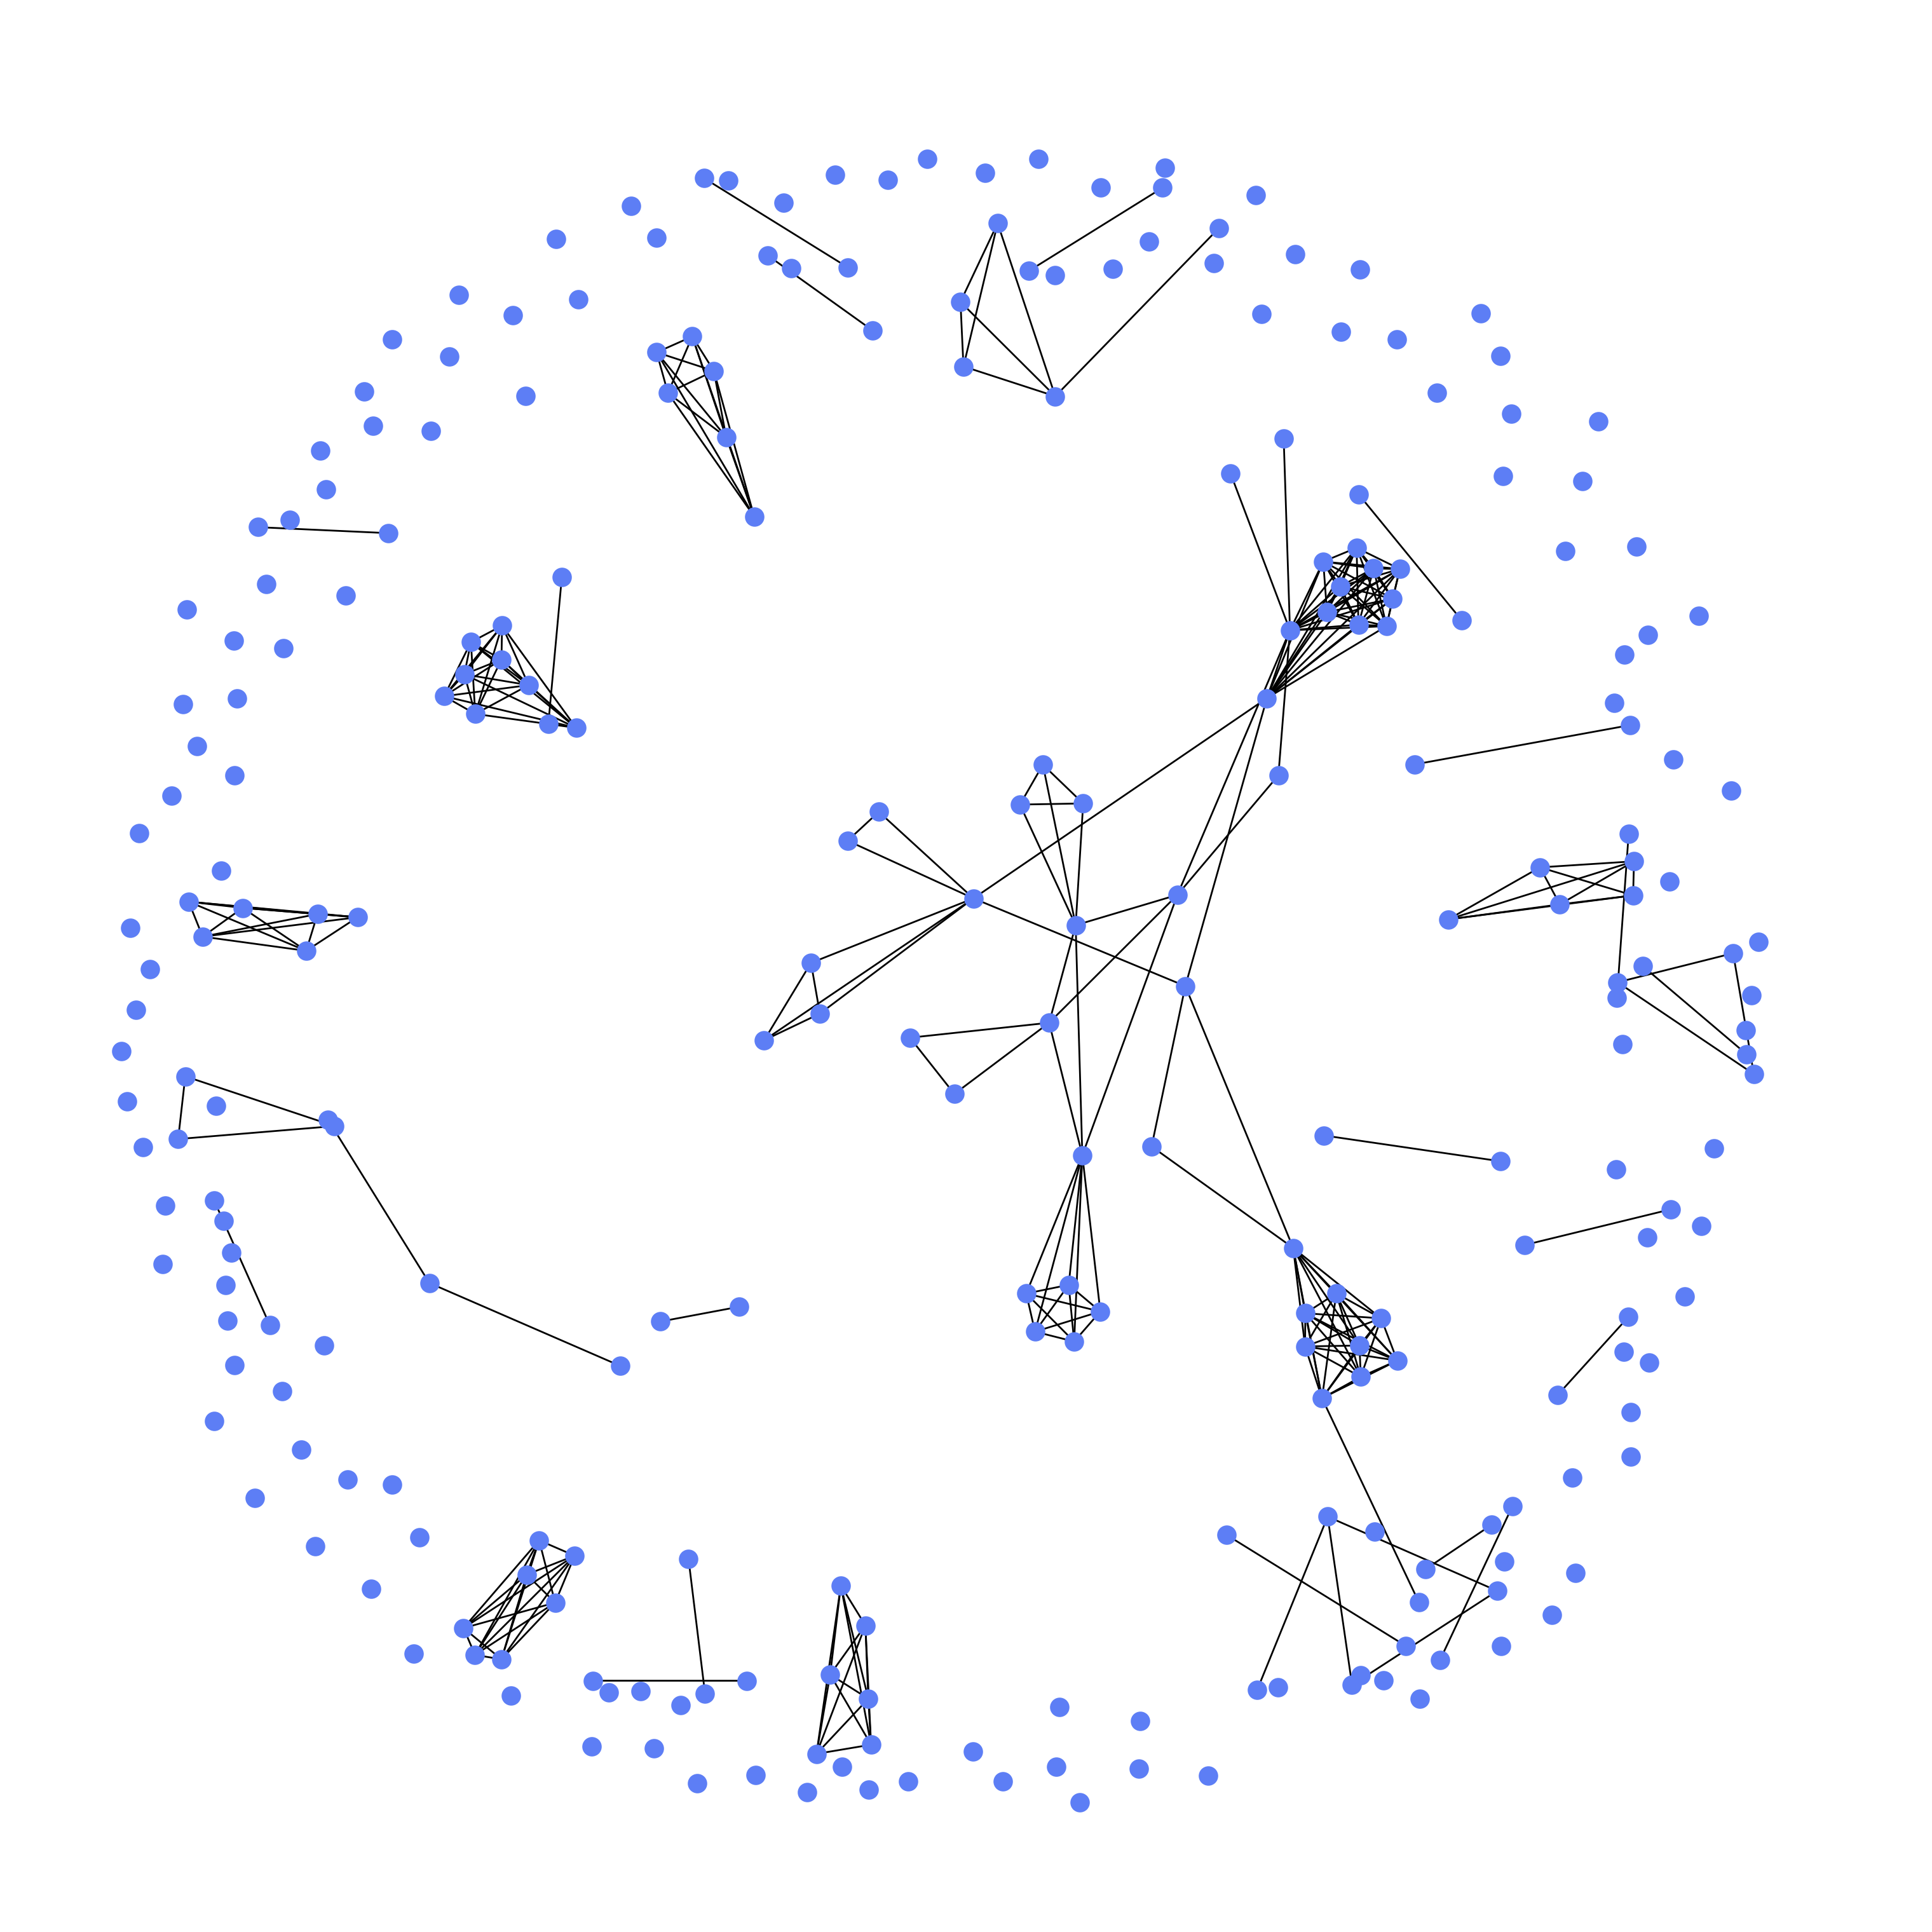

In [33]:
plt.figure(num=None, figsize=(15, 15), dpi=200)
pos = nx.spring_layout(subgraph, k=0.25)
nx.draw(subgraph, pos, node_size=100,node_color='#5D7EF5')

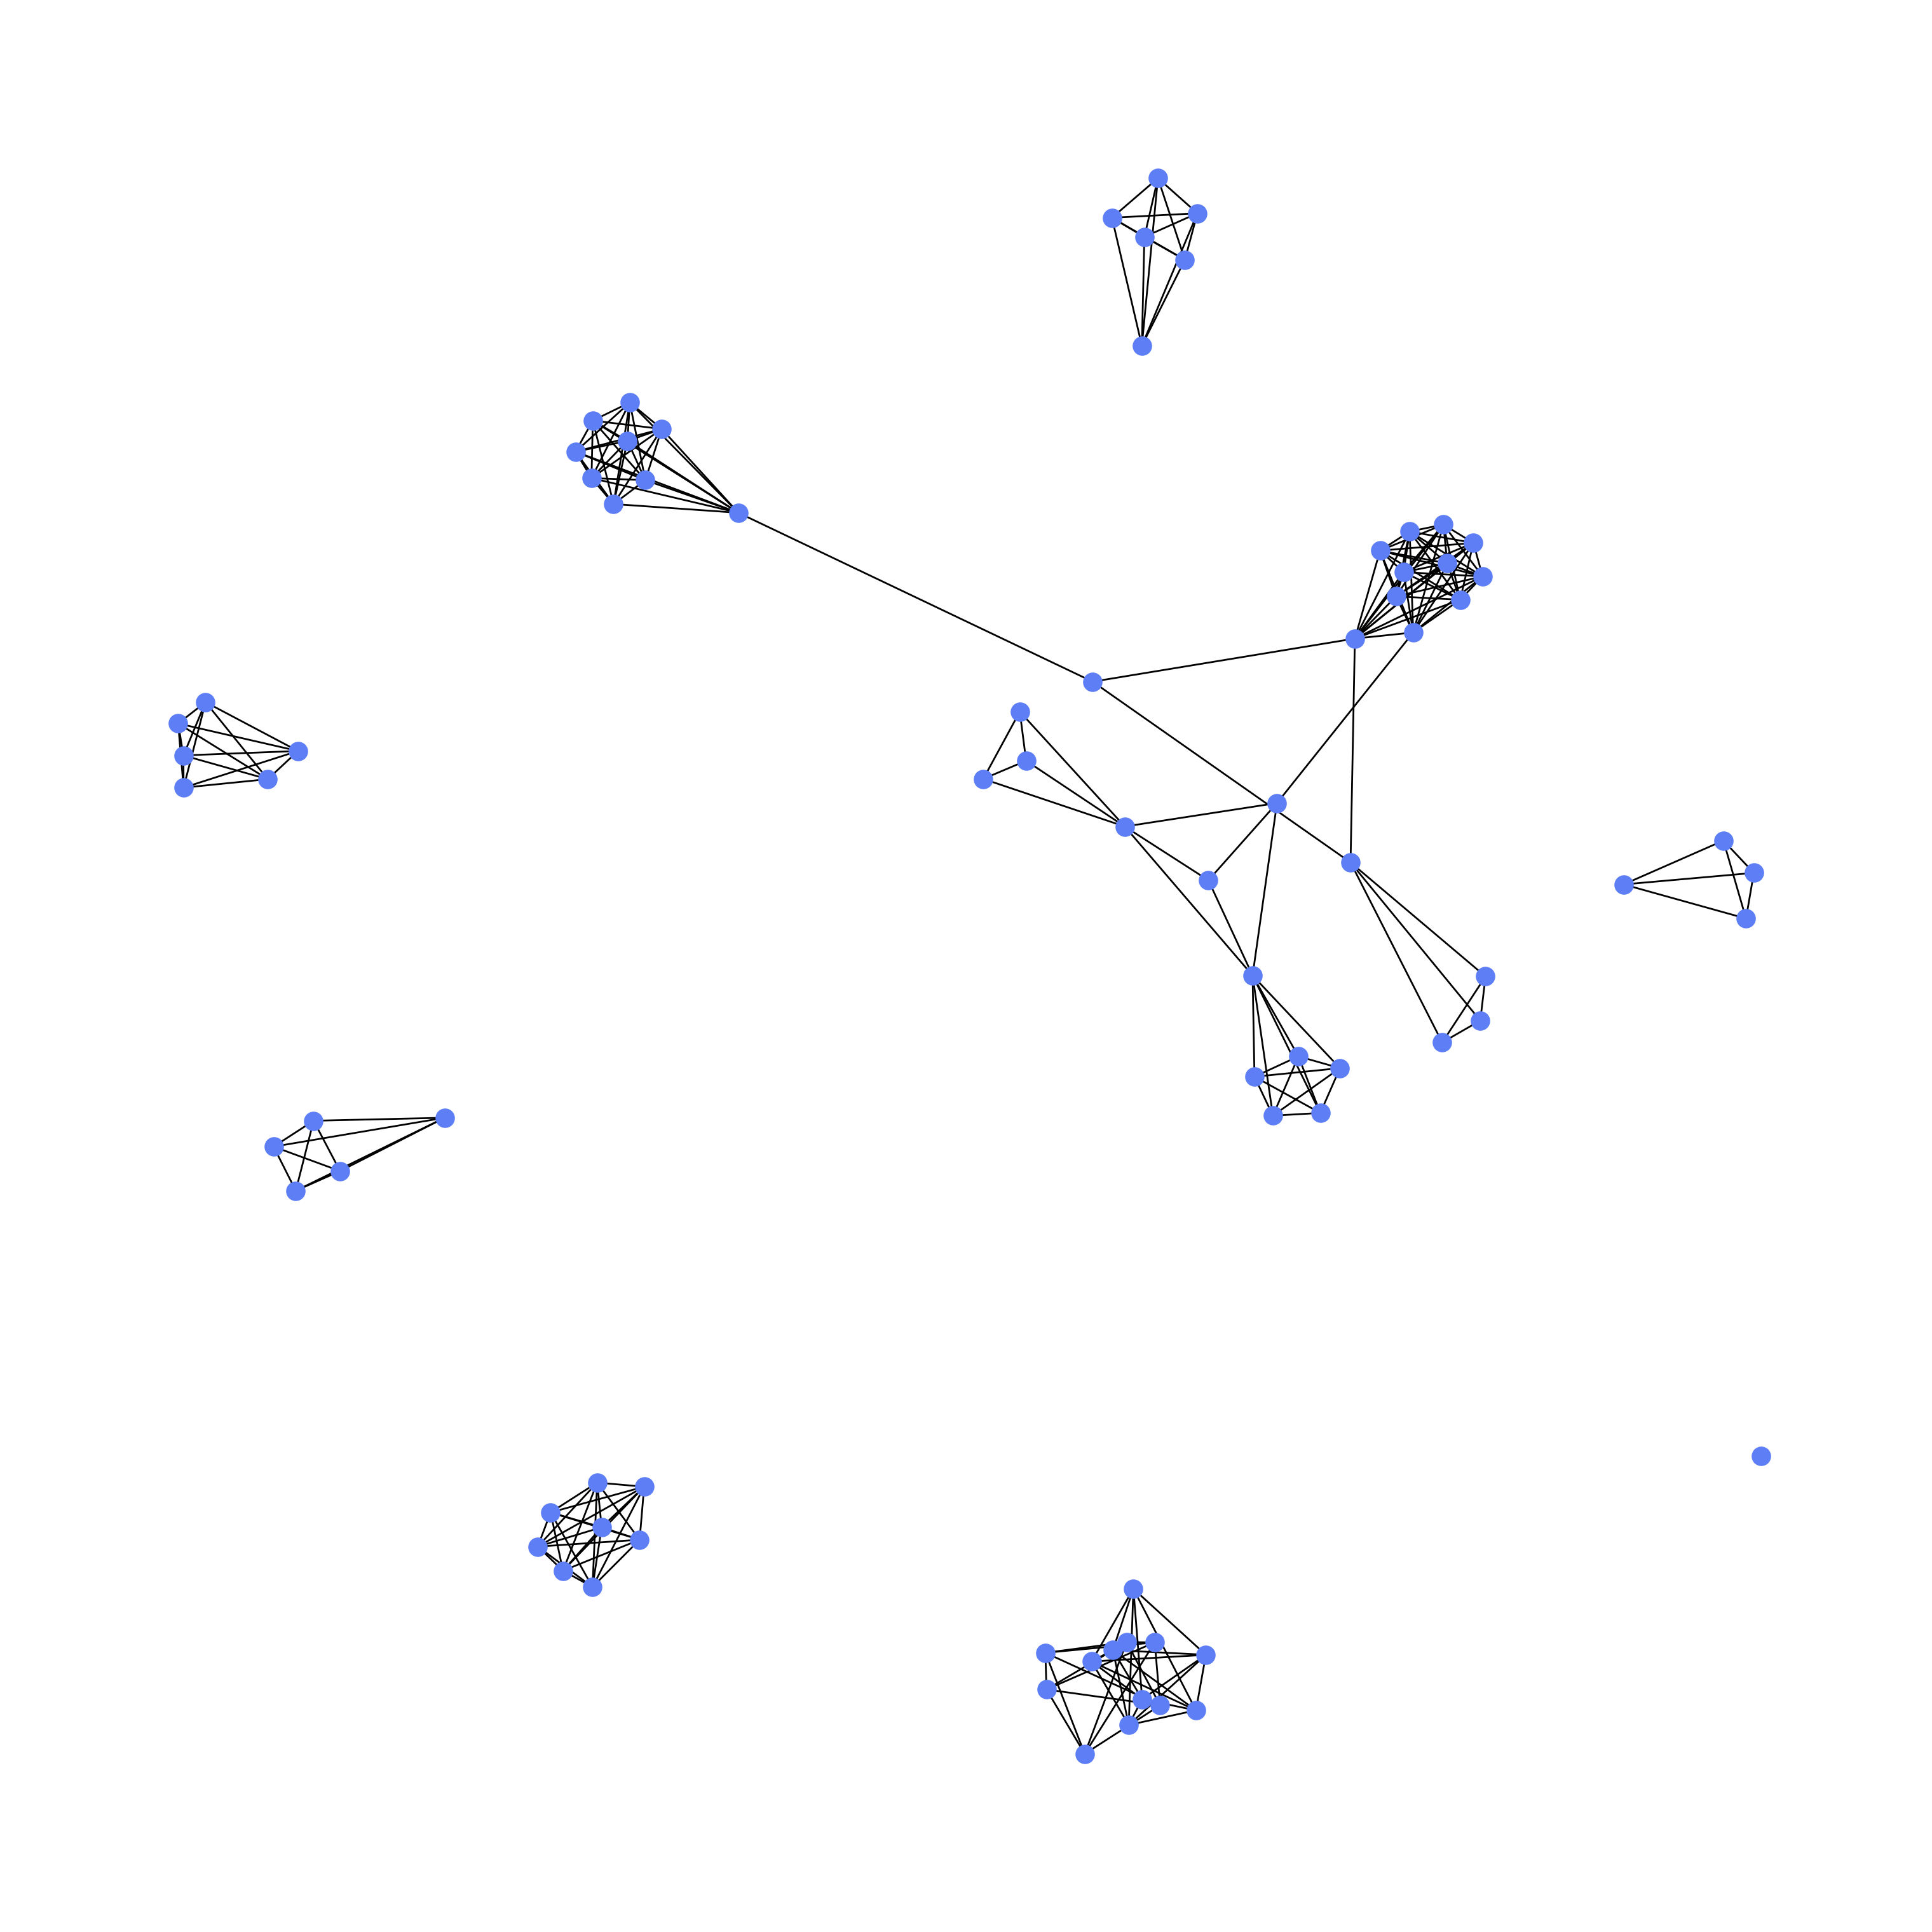

In [24]:
# Create a graph containing only the nodes with at least two edges
graph_for_clustering_removed = nx.Graph()
for node in subgraph.nodes:
    if subgraph.degree(node) > 2:
        graph_for_clustering_removed.add_node(node, name=subgraph.nodes[node]['name'], color=subgraph.nodes[node]['color'])
        for neighbor in subgraph.neighbors(node):
            if subgraph.degree(neighbor) > 2:
                graph_for_clustering_removed.add_node(neighbor, name=subgraph.nodes[neighbor]['name'], color=subgraph.nodes[neighbor]['color'])
                graph_for_clustering_removed.add_edge(node, neighbor)

plt.figure(num=None, figsize=(15, 15), dpi=200)
pos = nx.spring_layout(graph_for_clustering_removed, k=0.25)
nx.draw(graph_for_clustering_removed, pos, node_size=100,node_color='#5D7EF5')



Coefficiente di clustering medio: Questo coefficiente misura la probabilità che i vicini di un nodo siano anche vicini tra di loro. Un coefficiente di clustering elevato indica una maggiore omogeneità statistica

In [26]:
mean_clustering = nx.average_clustering(graph_for_clustering_removed)

print("Mean clustering coefficient:", mean_clustering)

Mean clustering coefficient: 0.9397273486747172


Coefficiente di assortatività: Questo coefficiente misura la tendenza dei nodi simili ad associarsi tra di loro. Un coefficiente di assortatività elevato indica una maggiore omogeneità statistica.

In [27]:
assortativity = nx.degree_assortativity_coefficient(graph_for_clustering_removed)

print("Assortativity coefficient:", assortativity)

Assortativity coefficient: 0.8081480536280796


In [30]:
mean_degree = nx.average_degree_connectivity(graph_for_clustering_removed)

print("Mean degree:", mean_degree)

Mean degree: {10: 10.06, 12: 9.25, 7: 6.682539682539683, 5: 5.168, 4: 4.625, 2: 3.3, 3: 3.7, 6: 5.8125, 8: 7.902777777777778, 0: 0}


In [8]:
def same_langs(repo1, repo2):
    langs1 = set(G.nodes[repo1]['languages'])
    langs2 = set(G.nodes[repo2]['languages'])
    return langs1 == langs2

repos = [r for r in G.nodes if r.startswith('r_')]
structural_equivalence = nx.equivalence_classes(repos, same_langs)

# Print the number of structural equivalence classes
print("\nNumber of structural equivalence classes:", structural_equivalence)

# Ottieni le combinazioni di linguaggi utilizzati insieme
lang_combinations = {}
for equiv_class in structural_equivalence:
    lang_set = set()
    for repo in equiv_class:
        lang_set.update(set(G.nodes[repo]['languages']))
    for combo in combinations(lang_set, 2):
        lang_combinations[combo] = lang_combinations.get(combo, 0) + 1

#creazione del grafo
G_langs = nx.Graph()

top_combinations = sorted(lang_combinations.items(), key=lambda x: x[1], reverse=True)[:50]

print("\nTop 5 language combinations:")
for combo, count in top_combinations:
    print(combo, count)

#creazione del grafo
G_langs = nx.Graph()
for combo, count in top_combinations:
    lang1, lang2 = combo
    G_langs.add_edge(lang1, lang2, weight=count)


Number of structural equivalence classes: {frozenset({'r_176'}), frozenset({'r_155'}), frozenset({'r_116'}), frozenset({'r_655', 'r_1016', 'r_770', 'r_684'}), frozenset({'r_175'}), frozenset({'r_835'}), frozenset({'r_356'}), frozenset({'r_1052'}), frozenset({'r_738'}), frozenset({'r_199'}), frozenset({'r_897', 'r_797'}), frozenset({'r_597'}), frozenset({'r_942'}), frozenset({'r_284'}), frozenset({'r_351'}), frozenset({'r_787'}), frozenset({'r_171'}), frozenset({'r_606'}), frozenset({'r_610'}), frozenset({'r_677'}), frozenset({'r_217'}), frozenset({'r_300'}), frozenset({'r_541', 'r_901', 'r_172', 'r_437', 'r_737', 'r_924', 'r_57'}), frozenset({'r_583'}), frozenset({'r_789'}), frozenset({'r_904'}), frozenset({'r_983'}), frozenset({'r_995', 'r_721'}), frozenset({'r_883'}), frozenset({'r_342'}), frozenset({'r_286'}), frozenset({'r_641', 'r_624'}), frozenset({'r_699'}), frozenset({'r_963'}), frozenset({'r_290'}), frozenset({'r_1031'}), frozenset({'r_371'}), frozenset({'r_99'}), frozenset({

In [9]:
cliques = list(nx.find_cliques(G_langs))

print("Number of cliques:", len(cliques))
print(cliques)

Number of cliques: 13
[['l_4', 'l_7'], ['l_4', 'l_13', 'l_0'], ['l_4', 'l_6', 'l_1', 'l_9', 'l_10', 'l_8'], ['l_4', 'l_6', 'l_1', 'l_9', 'l_10', 'l_0'], ['l_4', 'l_6', 'l_1', 'l_2', 'l_0'], ['l_4', 'l_6', 'l_11', 'l_9'], ['l_4', 'l_6', 'l_11', 'l_2'], ['l_4', 'l_6', 'l_18', 'l_8'], ['l_4', 'l_6', 'l_12'], ['l_4', 'l_6', 'l_30'], ['l_4', 'l_28', 'l_0'], ['l_4', 'l_14', 'l_0', 'l_1', 'l_2'], ['l_4', 'l_3', 'l_0', 'l_1']]


7


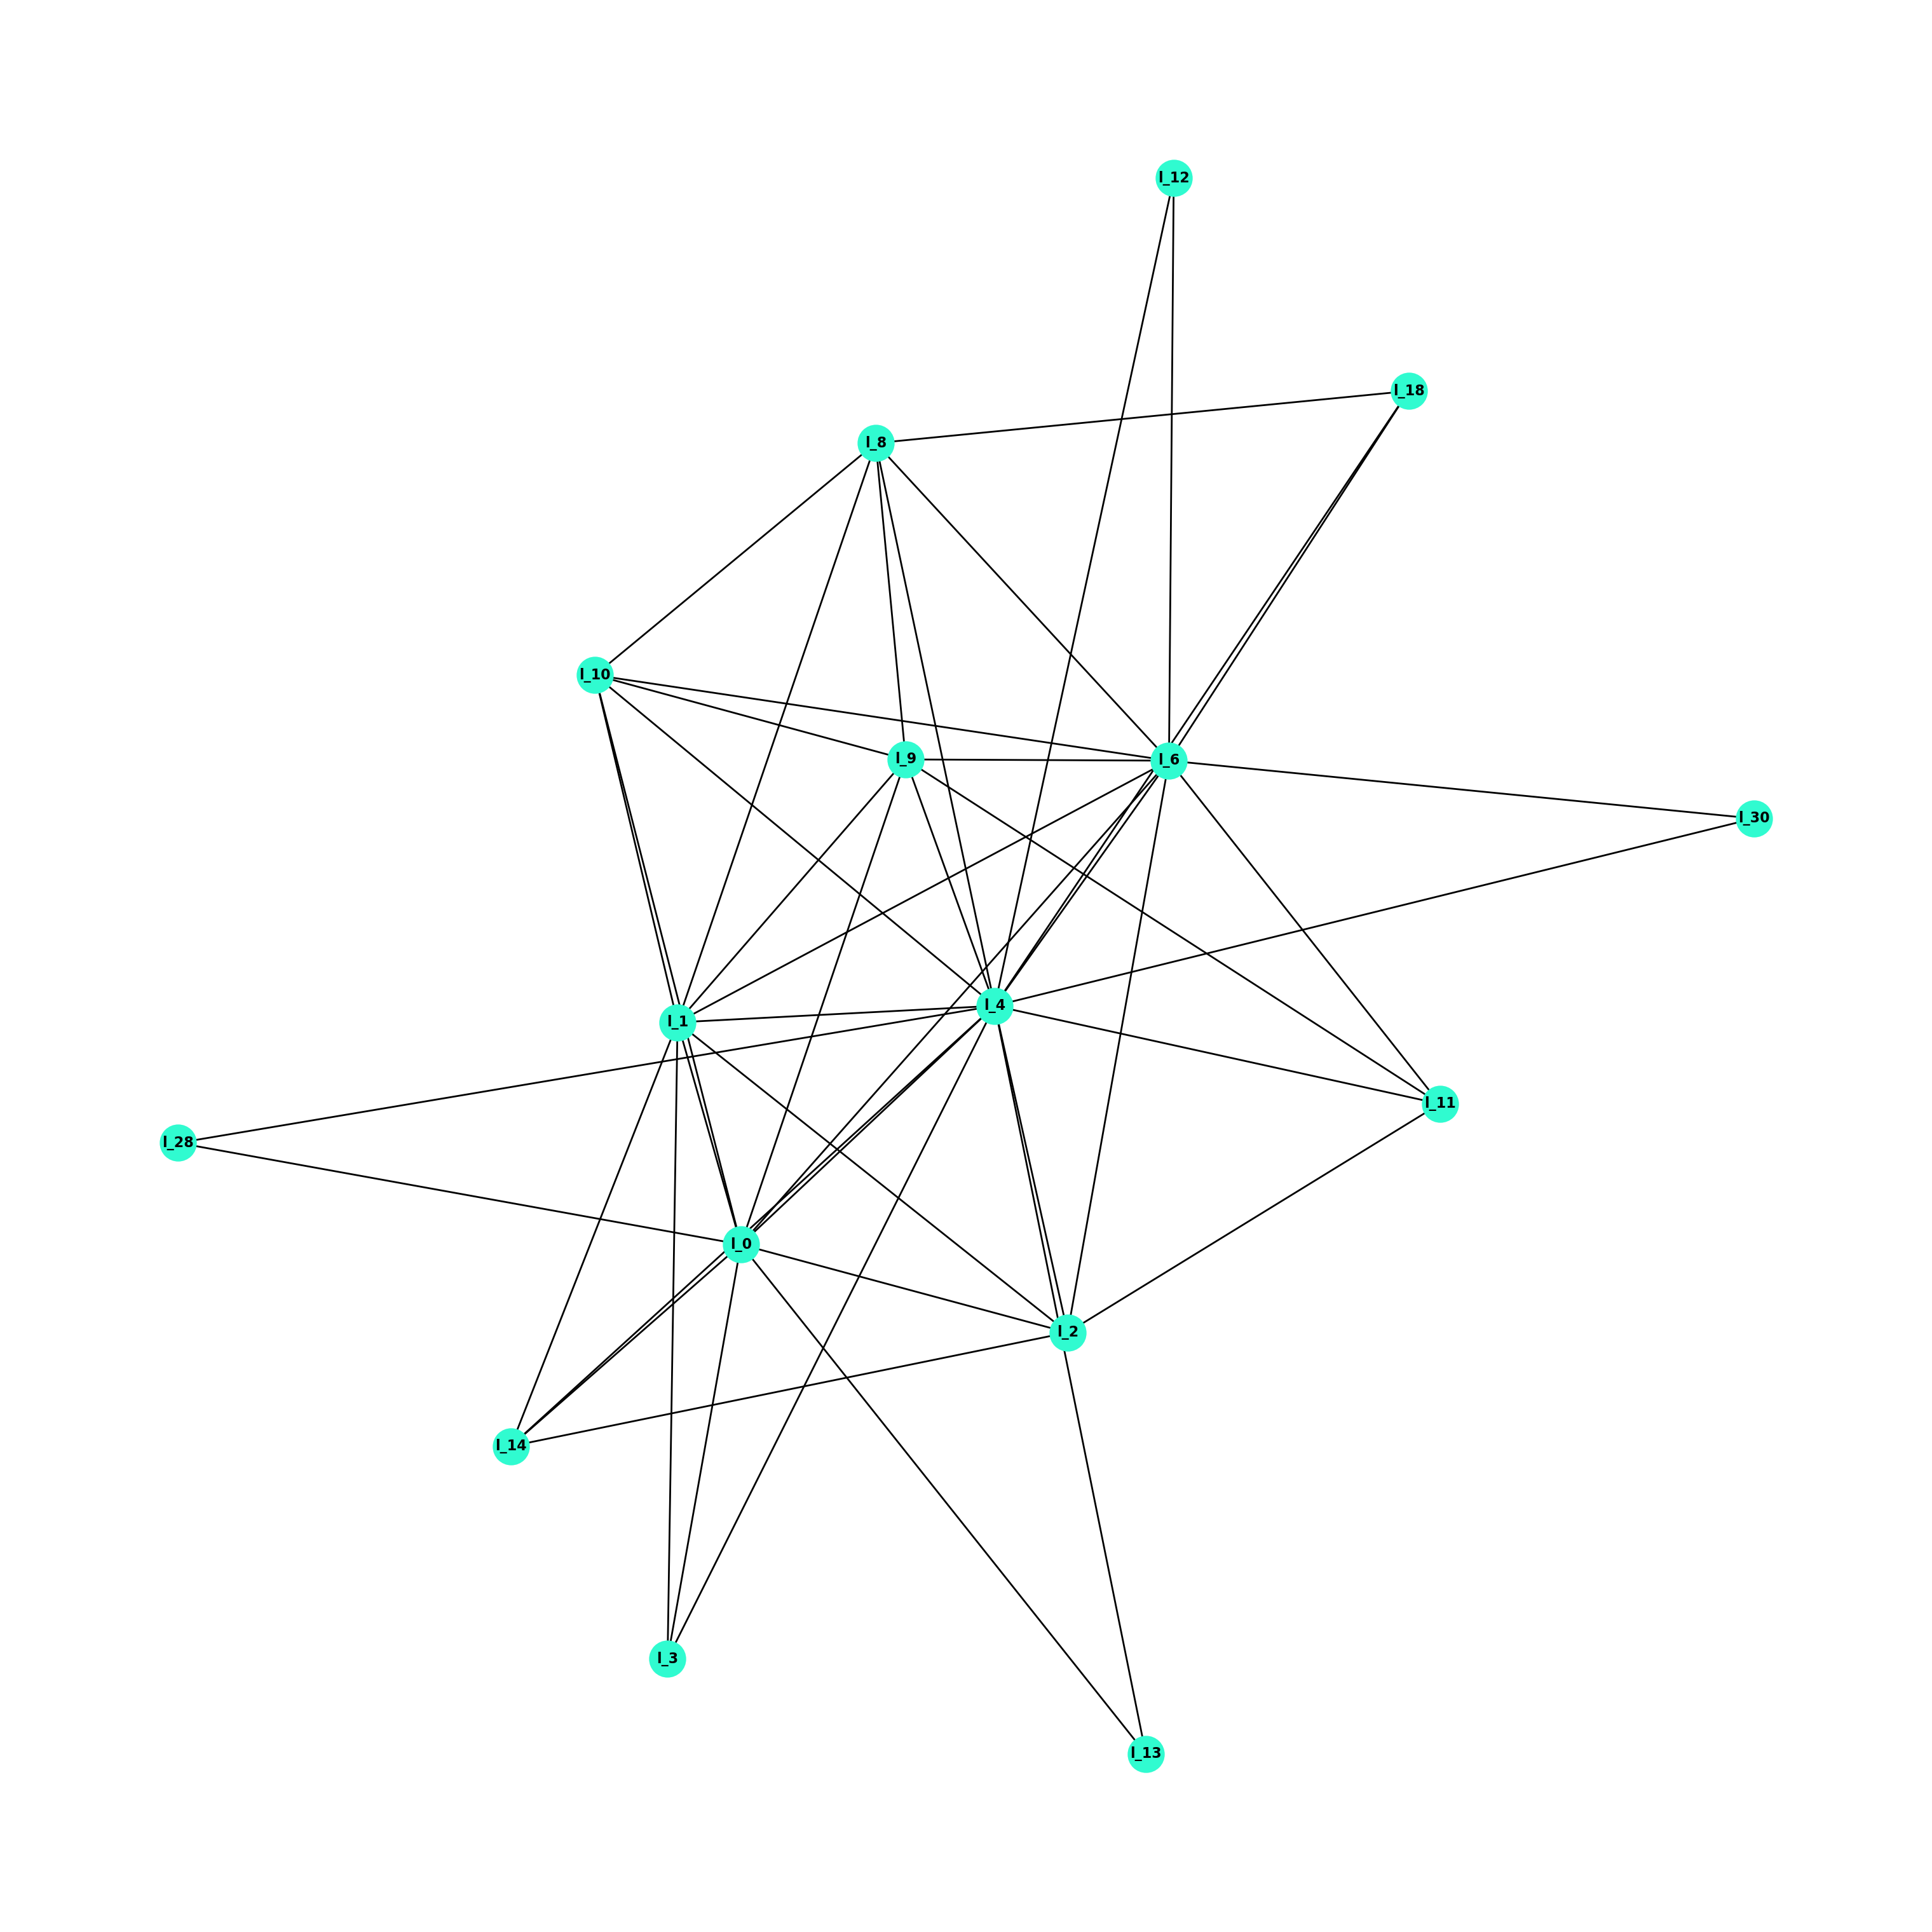

In [10]:
#draw the graph of the cliques in G_langs
G_langs_cliques = nx.Graph()

for clique in cliques:
    if len(clique) > 2:
        for node in clique:
            G_langs_cliques.add_node(node)
        for edge in combinations(clique, 2):
            G_langs_cliques.add_edge(edge[0], edge[1])

print(count)

plt.figure(num=None, figsize=(15, 15), dpi=200)
pos = nx.spring_layout(G_langs_cliques)
nx.draw(G_langs_cliques, pos, with_labels=True, font_size=8, font_weight='bold', node_color='#30FBD0',node_size=400)

In [11]:
#calculare structural equivalence classes
def same_langs(repo1, repo2):
    langs1 = set(G.nodes[repo1]['languages'])
    langs2 = set(G.nodes[repo2]['languages'])
    return langs1 == langs2

repos = [r for r in G.nodes if r.startswith('r_')]
structural_equivalence = nx.equivalence_classes(repos, same_langs)

# Print the number of structural equivalence classes
print("\nNumber of structural equivalence classes:", structural_equivalence)

# Ottieni le combinazioni di linguaggi utilizzati insieme 
lang_combinations = {}
for equiv_class in structural_equivalence:
    lang_set = set()
    for repo in equiv_class:
        lang_set.update(set(G.nodes[repo]['languages']))
    for combo in combinations(lang_set, 2):
        if 'l_4' not in combo:
            lang_combinations[combo] = lang_combinations.get(combo, 0) + 1

# Stampa le 5 combinazioni di linguaggi più utilizzate
top_combinations = sorted(lang_combinations.items(), key=lambda x: x[1], reverse=True)[:50]
print("\nTop 5 language combinations:")
for combo, count in top_combinations:
    print(combo, count)

#creazione del grafo
G_langs1 = nx.Graph()
for combo, count in top_combinations:
    lang1, lang2 = combo
    if lang1 != 'l_4' and lang2 != 'l_4':
        G_langs1.add_edge(lang1, lang2, weight=count)



Number of structural equivalence classes: {frozenset({'r_176'}), frozenset({'r_155'}), frozenset({'r_116'}), frozenset({'r_655', 'r_1016', 'r_770', 'r_684'}), frozenset({'r_175'}), frozenset({'r_835'}), frozenset({'r_356'}), frozenset({'r_1052'}), frozenset({'r_738'}), frozenset({'r_199'}), frozenset({'r_897', 'r_797'}), frozenset({'r_597'}), frozenset({'r_942'}), frozenset({'r_284'}), frozenset({'r_351'}), frozenset({'r_787'}), frozenset({'r_171'}), frozenset({'r_606'}), frozenset({'r_610'}), frozenset({'r_677'}), frozenset({'r_217'}), frozenset({'r_300'}), frozenset({'r_541', 'r_901', 'r_172', 'r_437', 'r_737', 'r_924', 'r_57'}), frozenset({'r_583'}), frozenset({'r_789'}), frozenset({'r_904'}), frozenset({'r_983'}), frozenset({'r_995', 'r_721'}), frozenset({'r_883'}), frozenset({'r_342'}), frozenset({'r_286'}), frozenset({'r_641', 'r_624'}), frozenset({'r_699'}), frozenset({'r_963'}), frozenset({'r_290'}), frozenset({'r_1031'}), frozenset({'r_371'}), frozenset({'r_99'}), frozenset({

In [12]:
cliques = list(nx.find_cliques(G_langs1))

print("Number of cliques:", len(cliques))
print(cliques)

Number of cliques: 13
[['l_0', 'l_13'], ['l_0', 'l_28'], ['l_0', 'l_1', 'l_6', 'l_10', 'l_8', 'l_9'], ['l_0', 'l_1', 'l_6', 'l_10', 'l_8', 'l_14'], ['l_0', 'l_1', 'l_6', 'l_2', 'l_14'], ['l_0', 'l_1', 'l_7'], ['l_0', 'l_1', 'l_3'], ['l_0', 'l_18', 'l_6', 'l_8', 'l_9'], ['l_0', 'l_18', 'l_6', 'l_2'], ['l_30', 'l_18', 'l_6', 'l_9'], ['l_12', 'l_6'], ['l_11', 'l_18', 'l_6', 'l_8', 'l_9'], ['l_11', 'l_18', 'l_6', 'l_2']]


0


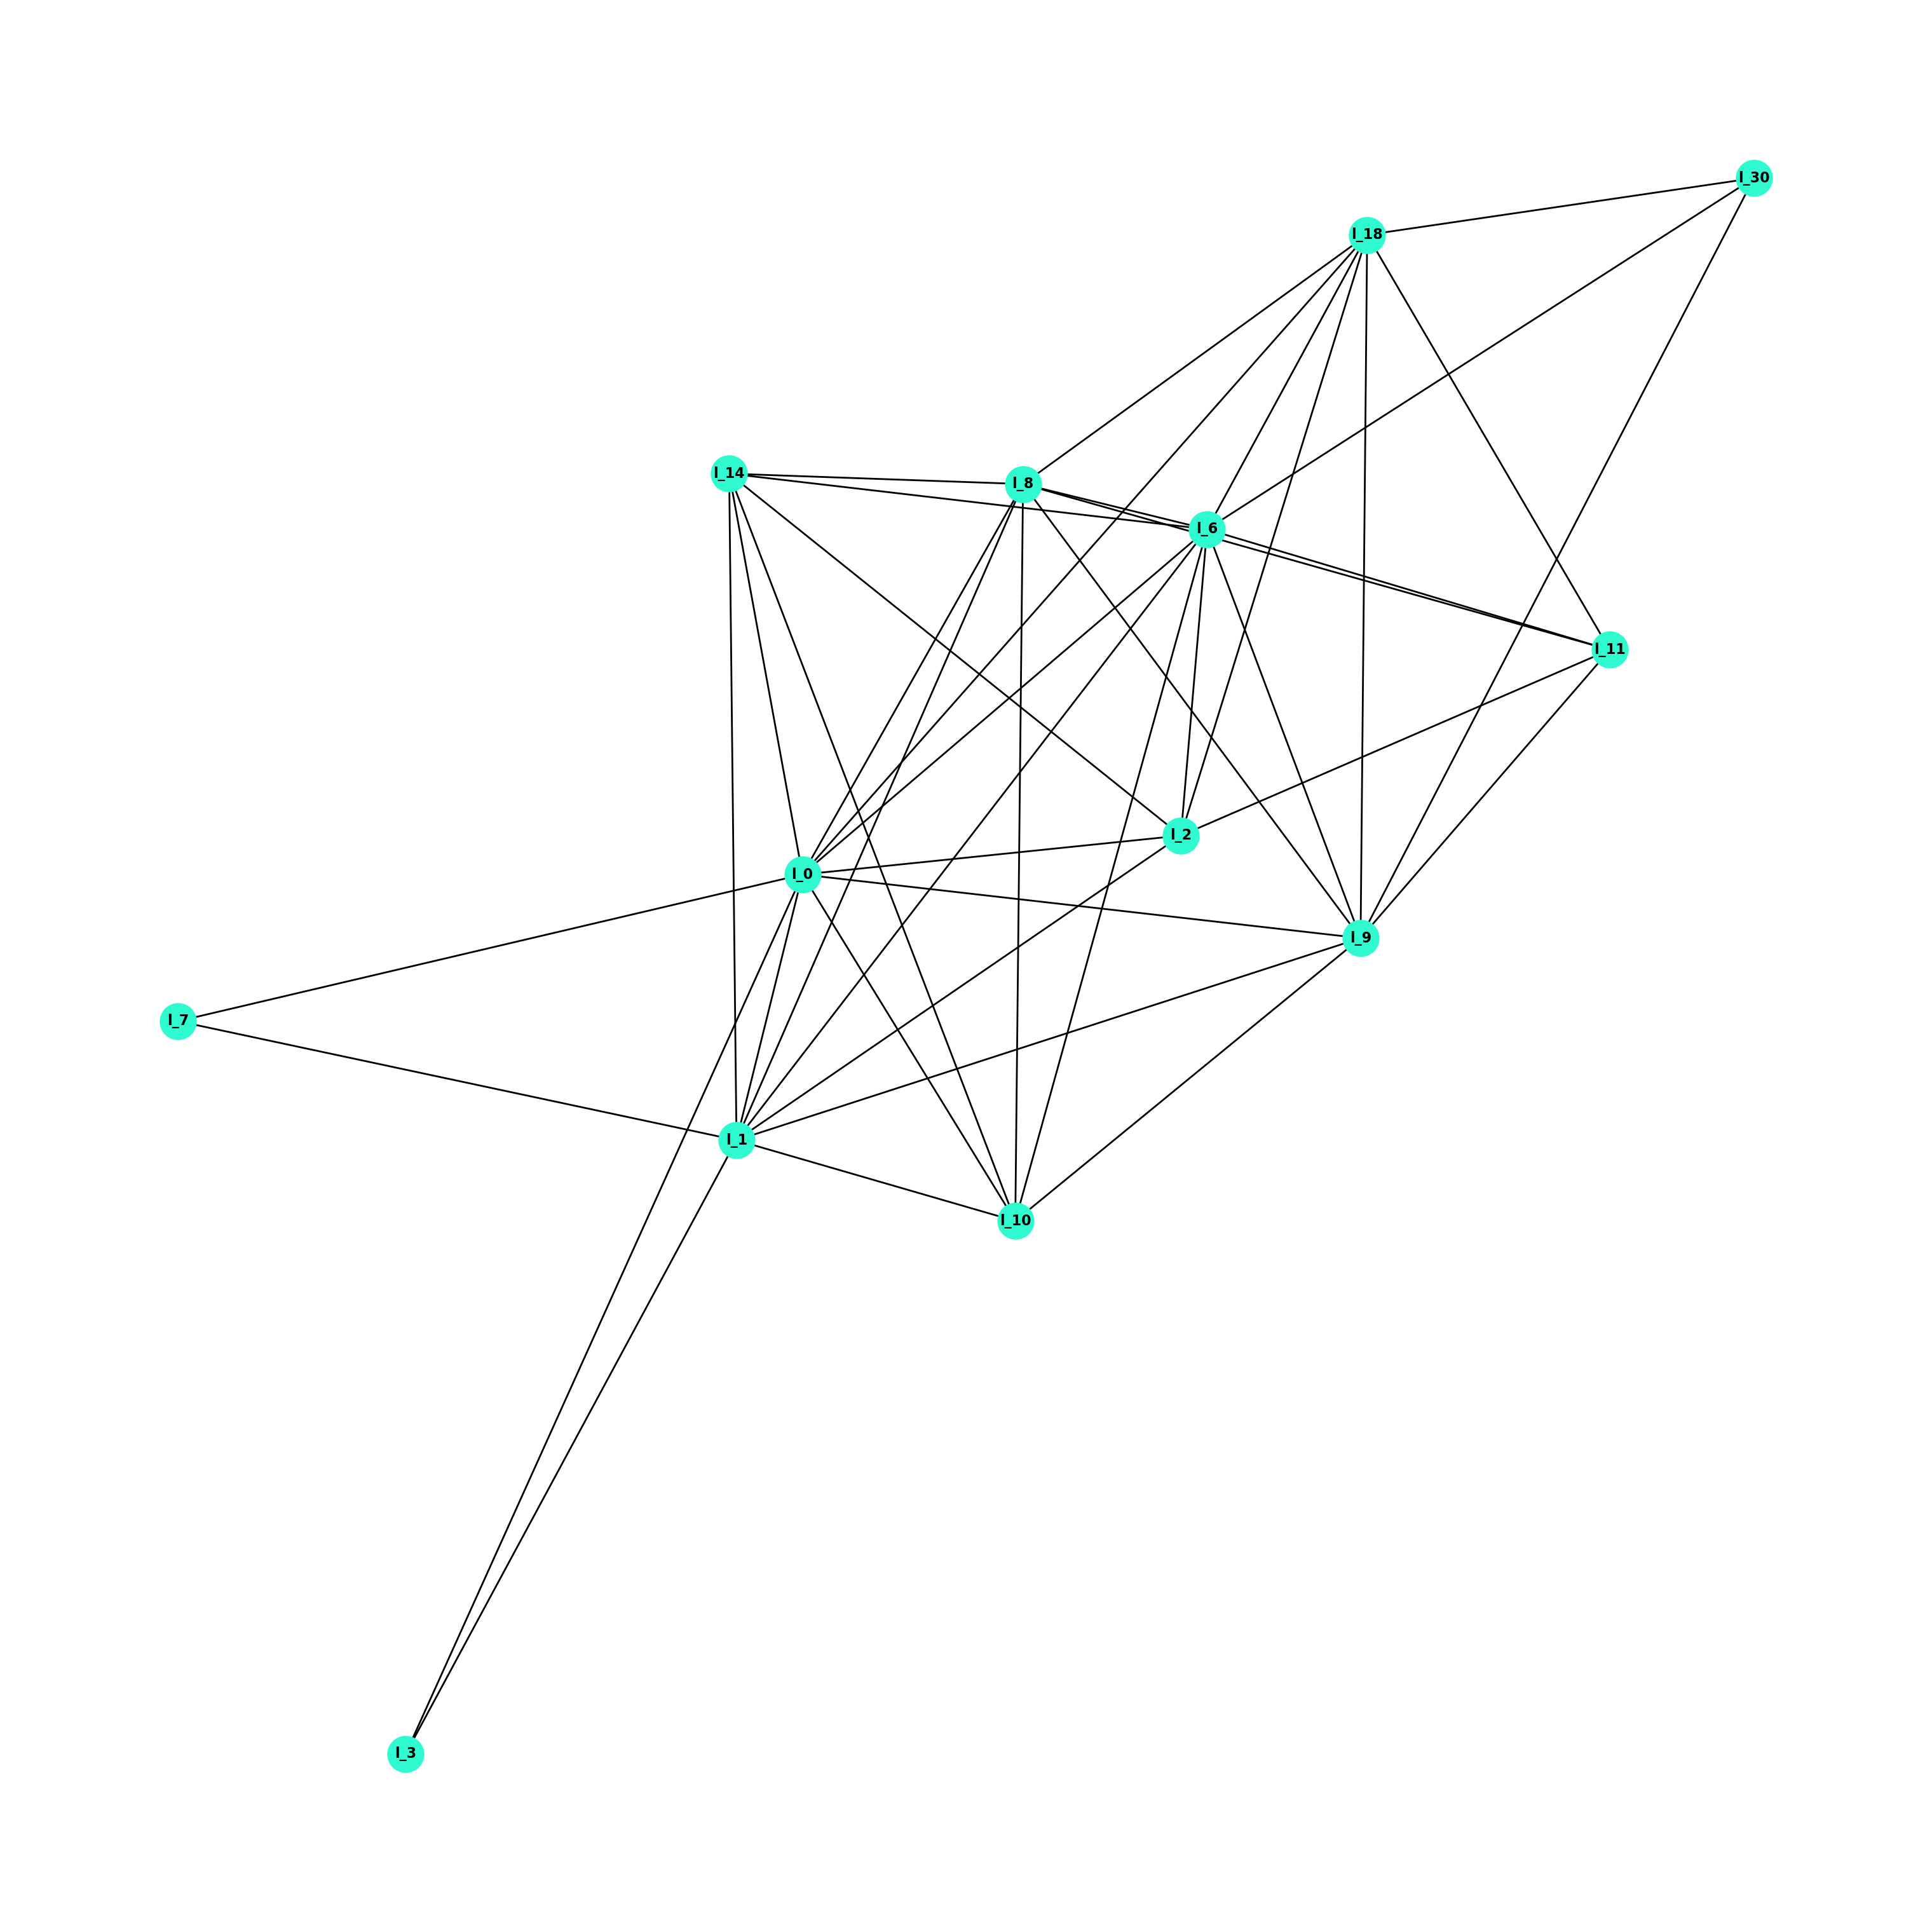

In [13]:
count= 0
G_langs_cliques = nx.Graph()

for clique in cliques:
    if len(clique) > 2:
        for node in clique:
            G_langs_cliques.add_node(node)
        for edge in combinations(clique, 2):
            G_langs_cliques.add_edge(edge[0], edge[1])

print(count)

plt.figure(num=None, figsize=(15, 15), dpi=200)
pos = nx.spring_layout(G_langs_cliques)
nx.draw(G_langs_cliques, pos, with_labels=True, font_size=8, font_weight='bold', node_color='#30FBD0',node_size=400)

#draw the cliques graph with only node degree > 1